In [1]:
import numpy as np
import pandas as pd

start和end以及freq配合能够生成start和end范围内以频率freq的一组时间索引  

start和periods以及freq配合能够生成从start开始的频率为freq的periods个时间索引

In [2]:
pd.date_range(start="2018-12-14", end="2018-12-31", periods=None, freq='D')

DatetimeIndex(['2018-12-14', '2018-12-15', '2018-12-16', '2018-12-17',
               '2018-12-18', '2018-12-19', '2018-12-20', '2018-12-21',
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', freq='D')

In [3]:
index=pd.date_range("20170101",periods=10)
df = pd.DataFrame(np.random.rand(10),index=index)

In [5]:
df

,0
2017-01-01,0.467266
2017-01-02,0.526007
2017-01-03,0.800577
2017-01-04,0.732949
2017-01-05,0.326349
2017-01-06,0.634135
2017-01-07,0.327267
2017-01-08,0.340873
2017-01-09,0.560674
2017-01-10,0.354547


回到最开始的911数据的案例中，我们可以使用pandas提供的方法把时间字符串转化为时间序列

In [6]:
df = pd.read_csv("./911.csv")
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [7]:
#df["timeStamp"] = pd.to_datetime(df["timeStamp"],format="")
df["timeStamp"] = pd.to_datetime(df["timeStamp"])

In [8]:
df["timeStamp"].head()

0   2015-12-10 17:10:52
1   2015-12-10 17:29:21
2   2015-12-10 14:39:21
3   2015-12-10 16:47:36
4   2015-12-10 16:56:52
Name: timeStamp, dtype: datetime64[ns]

那么问题来了：
我们现在要统计每个月或者每个季度的次数怎么办呢？

## pandas重采样  
重采样：指的是将时间序列从一个频率转化为另一个频率进行处理的过程，将高频率数据转化为低频率数据为降采样，低频率转化为高频率为升采样

In [9]:
t = pd.DataFrame(np.random.uniform(10,50,(100,1)),
                 index=pd.date_range("20180101",periods=100))

In [10]:
t.resample("M").mean()

,0
2018-01-31,28.750458
2018-02-28,32.324880
2018-03-31,32.308669
2018-04-30,33.230014


In [12]:
t.resample("10D").count()

,0
2018-01-01,10
2018-01-11,10
2018-01-21,10
2018-01-31,10
2018-02-10,10
2018-02-20,10
2018-03-02,10
2018-03-12,10
2018-03-22,10
2018-04-01,10


## 动手
统计出911数据中不同月份电话次数的变化情况  

统计出911数据中不同月份不同类型的电话的次数的变化情况

In [11]:
# coding=utf-8
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
df = pd.read_csv("./911.csv")
df["timeStamp"] = pd.to_datetime(df["timeStamp"])
df.set_index("timeStamp",inplace=True)
df.head()

,lat,lng,desc,zip,title,twp,addr,e
timeStamp,,,,,,,,
2015-12-10 17:10:52,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,NEW HANOVER,REINDEER CT & DEAD END,1
2015-12-10 17:29:21,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2015-12-10 14:39:21,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,NORRISTOWN,HAWS AVE,1
2015-12-10 16:47:36,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,NORRISTOWN,AIRY ST & SWEDE ST,1
2015-12-10 16:56:52,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [12]:
#统计出911数据中不同月份电话次数的
count_by_month = df.resample("M").count()["title"]   # 从采样之前要时间设为索引
count_by_month.head()

timeStamp
2015-12-31     7916
2016-01-31    13096
2016-02-29    11396
2016-03-31    11059
2016-04-30    11287
Freq: M, Name: title, dtype: int64

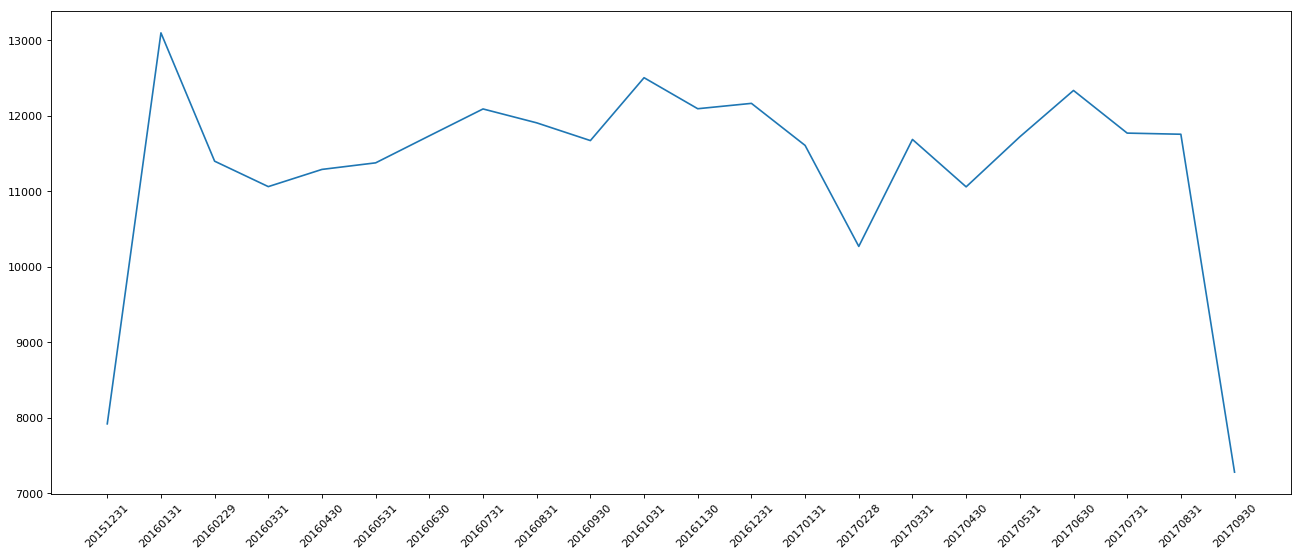

In [13]:
#画图
_x = count_by_month.index
_y = count_by_month.values
# for i in _x:
#     print(dir(i))
#     break
_x = [i.strftime("%Y%m%d") for i in _x]
plt.figure(figsize=(20,8),dpi=80)
plt.plot(range(len(_x)),_y)
plt.xticks(range(len(_x)),_x,rotation=45)
plt.show()

In [14]:
# coding=utf-8
#911数据中不同月份不同类型的电话的次数的变化情况
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#把时间字符串转为时间类型设置为索引
df = pd.read_csv("./911.csv")
df["timeStamp"] = pd.to_datetime(df["timeStamp"])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [15]:
#添加列，表示分类
temp_list = df["title"].str.split(": ").tolist()
cate_list = [i[0] for i in temp_list]
# print(np.array(cate_list).reshape((df.shape[0],1)))
df["cate"] = pd.DataFrame(np.array(cate_list).reshape((df.shape[0],1)))
df.set_index("timeStamp",inplace=True)
df.head()

,lat,lng,desc,zip,title,twp,addr,e,cate
timeStamp,,,,,,,,,
2015-12-10 17:10:52,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
2015-12-10 17:29:21,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2015-12-10 14:39:21,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,NORRISTOWN,HAWS AVE,1,Fire
2015-12-10 16:47:36,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
2015-12-10 16:56:52,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


DatetimeIndex(['2015-12-31', '2016-01-31', '2016-02-29', '2016-03-31',
               '2016-04-30', '2016-05-31', '2016-06-30', '2016-07-31',
               '2016-08-31', '2016-09-30', '2016-10-31', '2016-11-30',
               '2016-12-31', '2017-01-31', '2017-02-28', '2017-03-31',
               '2017-04-30', '2017-05-31', '2017-06-30', '2017-07-31',
               '2017-08-31', '2017-09-30'],
              dtype='datetime64[ns]', name='timeStamp', freq='M')
DatetimeIndex(['2015-12-31', '2016-01-31', '2016-02-29', '2016-03-31',
               '2016-04-30', '2016-05-31', '2016-06-30', '2016-07-31',
               '2016-08-31', '2016-09-30', '2016-10-31', '2016-11-30',
               '2016-12-31', '2017-01-31', '2017-02-28', '2017-03-31',
               '2017-04-30', '2017-05-31', '2017-06-30', '2017-07-31',
               '2017-08-31', '2017-09-30'],
              dtype='datetime64[ns]', name='timeStamp', freq='M')
DatetimeIndex(['2015-12-31', '2016-01-31', '2016-02-29', '2016-03-31',

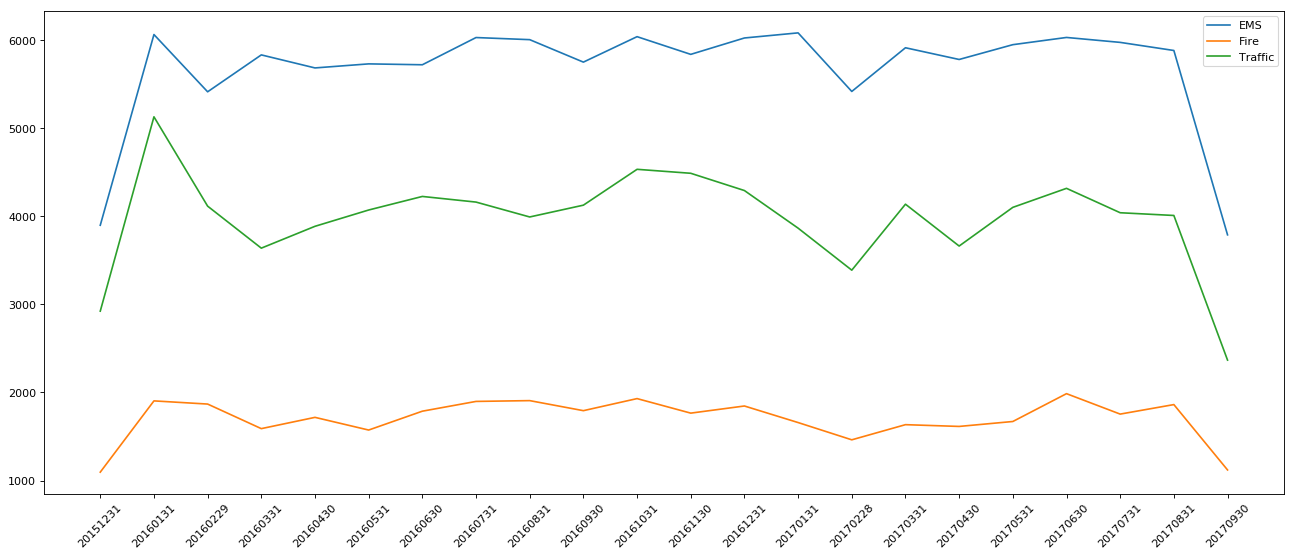

In [23]:
plt.figure(figsize=(20, 8), dpi=80)

#分组
for group_name,group_data in df.groupby(by="cate"):
    #对不同的分类都进行绘图
    count_by_month = group_data.resample("M").count()["title"]
    # 画图
    _x = count_by_month.index
    print(_x)
    _y = count_by_month.values
    _x = [i.strftime("%Y%m%d") for i in _x]
    plt.plot(range(len(_x)), _y, label=group_name)
plt.xticks(range(len(_x)), _x, rotation=45)
plt.legend(loc="best")
plt.show()

## 思考
现在我们有北上广、深圳、和沈阳5个城市空气质量数据，请绘制出5个城市的PM2.5随时间的变化情况



观察这组数据中的时间结构，并不是字符串，这个时候我们应该怎么办？

之前所学习的DatetimeIndex可以理解为时间戳  

那么现在我们要学习的PeriodIndex可以理解为时间段     也就是时间区间


periods = pd.PeriodIndex(year=data["year"],month=data["month"],day=data["day"],hour=data["hour"],freq="H")


那么如果给这个时间段降采样呢？  
data = df.set_index(periods).resample("10D").mean()

## 动手
请绘制出5个城市的PM2.5随时间的变化情况

In [17]:
# coding=utf-8
import pandas as pd
from matplotlib import  pyplot as plt
file_path = "./PM2.5/BeijingPM20100101_20151231.csv"

df = pd.read_csv(file_path)
df.head()

,No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,NaN,-21.0,43.0,1021.0,-11.0,NW,1.79,0.0,0.0
1,2,2010,1,1,1,4,NaN,NaN,NaN,NaN,-21.0,47.0,1020.0,-12.0,NW,4.92,0.0,0.0
2,3,2010,1,1,2,4,NaN,NaN,NaN,NaN,-21.0,43.0,1019.0,-11.0,NW,6.71,0.0,0.0
3,4,2010,1,1,3,4,NaN,NaN,NaN,NaN,-21.0,55.0,1019.0,-14.0,NW,9.84,0.0,0.0
4,5,2010,1,1,4,4,NaN,NaN,NaN,NaN,-20.0,51.0,1018.0,-12.0,NW,12.97,0.0,0.0


In [22]:
#把分开的时间字符串通过periodIndex的方法转化为pandas的时间类型
period = pd.PeriodIndex(year=df["year"],month=df["month"],day=df["day"],hour=df["hour"],freq="H")
df["datetime"] = period
period

PeriodIndex(['2010-01-04 11:00', '2010-01-11 11:00', '2010-01-18 11:00',
             '2010-01-25 11:00', '2010-01-14 11:00', '2010-02-08 11:00',
             '2010-02-15 11:00', '2010-02-22 11:00', '2010-02-13 11:00',
             '2010-03-08 11:00',
             ...
             '2015-10-26 11:00', '2015-10-10 11:00', '2015-11-09 11:00',
             '2015-11-16 11:00', '2015-11-23 11:00', '2015-11-17 11:00',
             '2015-12-07 11:00', '2015-12-14 11:00', '2015-12-21 11:00',
             '2015-12-28 11:00'],
            dtype='period[H]', length=313, freq='H')

In [23]:
# print(df.head(10))
#把datetime 设置为索引
df.set_index("datetime",inplace=True)
#进行降采样
df = df.resample("7D").mean()
df.head()

,No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec
datetime,,,,,,,,,,,,,,,,,
2010-01-04 11:00:00,84.5,2010.000000,1.000000,4.000000,11.5,4.0,NaN,NaN,NaN,71.627586,-18.255952,54.395833,1027.910714,-10.202381,43.859821,0.066667,0.786905
2010-01-11 11:00:00,504.5,2010.000000,1.285714,12.642857,11.5,4.0,NaN,NaN,NaN,61.747024,-18.300595,42.157738,1027.654762,-6.056548,36.008601,0.000000,0.000000
2010-01-18 11:00:00,420.5,2010.000000,1.000000,18.000000,11.5,4.0,NaN,NaN,NaN,163.654762,-12.630952,57.755952,1030.386905,-4.946429,17.492976,0.000000,0.000000
2010-01-25 11:00:00,588.5,2010.000000,1.000000,25.000000,11.5,4.0,NaN,NaN,NaN,68.069307,-17.404762,34.095238,1026.196429,-2.672619,54.854048,0.000000,0.000000
2010-02-01 11:00:00,8820.5,2010.857143,2.571429,7.428571,11.5,4.0,NaN,NaN,NaN,57.500000,-18.166667,37.755952,1032.470238,-5.654762,167.737024,0.000000,0.000000


In [24]:
# 处理缺失数据，删除缺失数据?
# print(df["PM_US Post"])
data  =df["PM_US Post"]
data_china = df["PM_Nongzhanguan"]
data_china.head(10)

datetime
2010-01-04 11:00:00   NaN
2010-01-11 11:00:00   NaN
2010-01-18 11:00:00   NaN
2010-01-25 11:00:00   NaN
2010-02-01 11:00:00   NaN
2010-02-08 11:00:00   NaN
2010-02-15 11:00:00   NaN
2010-02-22 11:00:00   NaN
2010-03-01 11:00:00   NaN
2010-03-08 11:00:00   NaN
Freq: 7D, Name: PM_Nongzhanguan, dtype: float64

313 313


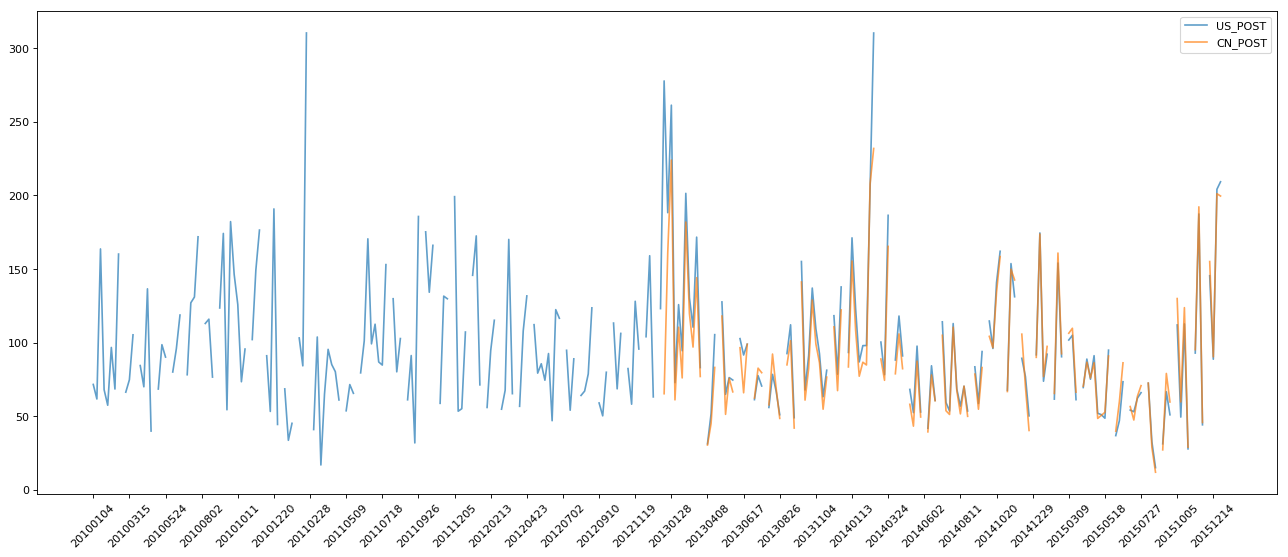

In [25]:
_x = data.index
_x = [i.strftime("%Y%m%d") for i in _x]
_x_china = [i.strftime("%Y%m%d") for i in data_china.index]
print(len(_x_china),len(_x_china))
_y = data.values
_y_china = data_china.values

plt.figure(figsize=(20,8),dpi=80)

plt.plot(range(len(_x)),_y,label="US_POST",alpha=0.7)
plt.plot(range(len(_x_china)),_y_china,label="CN_POST",alpha=0.7)

plt.xticks(range(0,len(_x_china),10),list(_x_china)[::10],rotation=45)

plt.legend(loc="best")

plt.show()